# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



### **Dataset yang Digunakan**
Pada proyek ini, saya menggunakan dataset **Customers.csv** yang berasal dari Kaggle. Dataset ini merupakan rekomendasi dari pihak Dicoding dan dapat diakses melalui tautan berikut:  
[Customers Dataset - Kaggle](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

#### **Alasan Pemilihan Dataset**
Dataset ini dipilih karena memenuhi kriteria berikut:  
1. **Tanpa Label**: Dataset tidak memiliki label atau target variabel sehingga cocok untuk unsupervised learning seperti clustering.  
2. **Jumlah Baris**: Dataset memiliki lebih dari **1000 baris**, sesuai dengan persyaratan minimal.  
3. **Jenis Data**: Dataset mencakup **data kategorikal** (contoh: gender) dan **data numerikal** (contoh: usia, pendapatan tahunan, dan skor pengeluaran).

#### **Manfaat Dataset**
Dataset ini memberikan peluang untuk:  
1. **Analisis Data Pelanggan**: Mengelompokkan pelanggan berdasarkan pola belanja dan karakteristik demografis.  
2. **Penerapan Clustering**: Cocok untuk algoritma seperti K-Means untuk mengidentifikasi segmen pelanggan.  
3. **Strategi Bisnis**: Menghasilkan insight yang dapat digunakan untuk mengembangkan strategi pemasaran yang efektif dan personalisasi layanan.

---



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [138]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import cm
import matplotlib.colors as mcolors



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [104]:
#memuat dataset customer
cust_data = ('customers.csv')
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [105]:
#1. Memahami Struktur Data

#Meninjau jumlah baris dan kolom dalam dataset
print("Jumlah baris dan kolom dalam dataset :", df.shape)

#Meninjau jenis data dari setiap kolom
print("\nJenis data di setiap kolom:\n", df.dtypes)


Jumlah baris dan kolom dalam dataset : (2000, 8)

Jenis data di setiap kolom:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


In [106]:
#2. Menangani data yang hilang

#cek jumlah data yang hilang di setiap kolom
missing_values = df.isna().sum()
print("jumlah data yang hilang :")
print(missing_values)

#persentase data yang hilang
missing_percentage = df.isna().mean()*100
print ("\nPersentase data yang hilang :")
print(missing_percentage)

jumlah data yang hilang :
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Persentase data yang hilang :
CustomerID                0.00
Gender                    0.00
Age                       0.00
Annual Income ($)         0.00
Spending Score (1-100)    0.00
Profession                1.75
Work Experience           0.00
Family Size               0.00
dtype: float64


In [107]:
#Menghapus data yang kosong
df = df.dropna()


In [108]:
#cek lagi jumlah data yang hilang di setiap kolom
missing_values = df.isna().sum()
print("jumlah data yang hilang :")
print(missing_values)

#persentase data yang hilang
missing_percentage = df.isna().mean()*100
print ("\nPersentase data yang hilang :")
print(missing_percentage)

jumlah data yang hilang :
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Persentase data yang hilang :
CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income ($)         0.0
Spending Score (1-100)    0.0
Profession                0.0
Work Experience           0.0
Family Size               0.0
dtype: float64


In [109]:
#menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


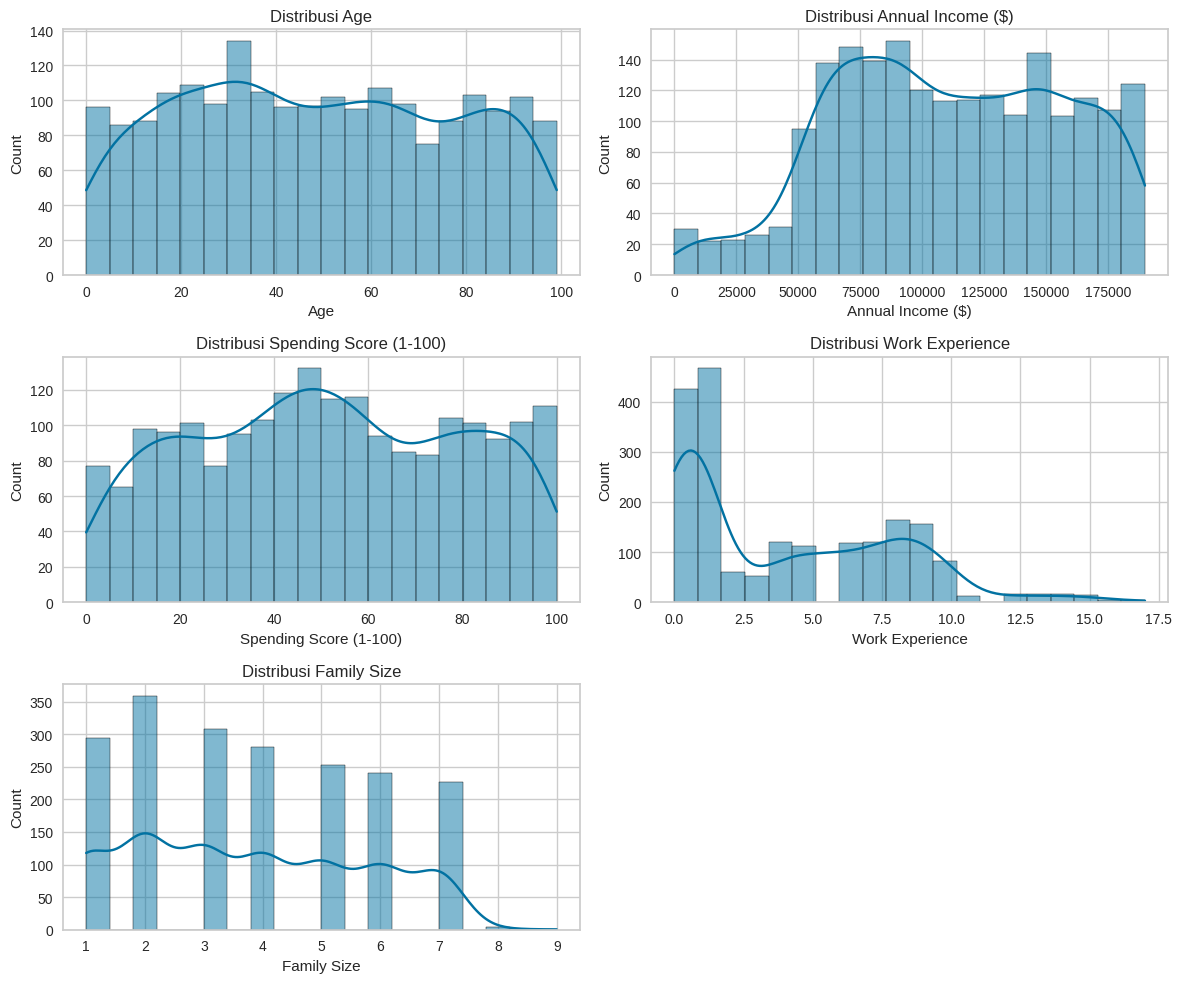

In [110]:
#Histogram untuk distribusi variabel numerik
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()



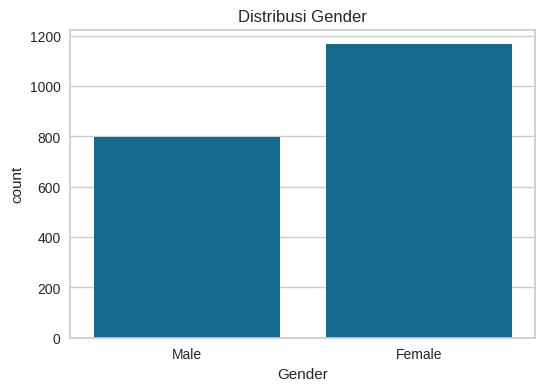

In [111]:
#Barplot untuk distribusi Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

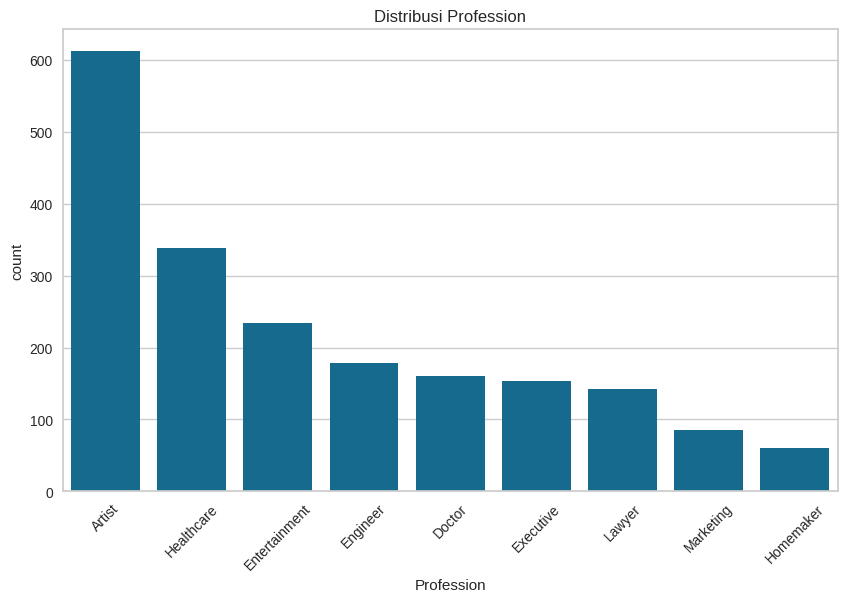

In [112]:
#Barplot untuk distribusi Profession
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', data=df, order=df['Profession'].value_counts().index)
plt.title('Distribusi Profession')
plt.xticks(rotation=45)
plt.show()

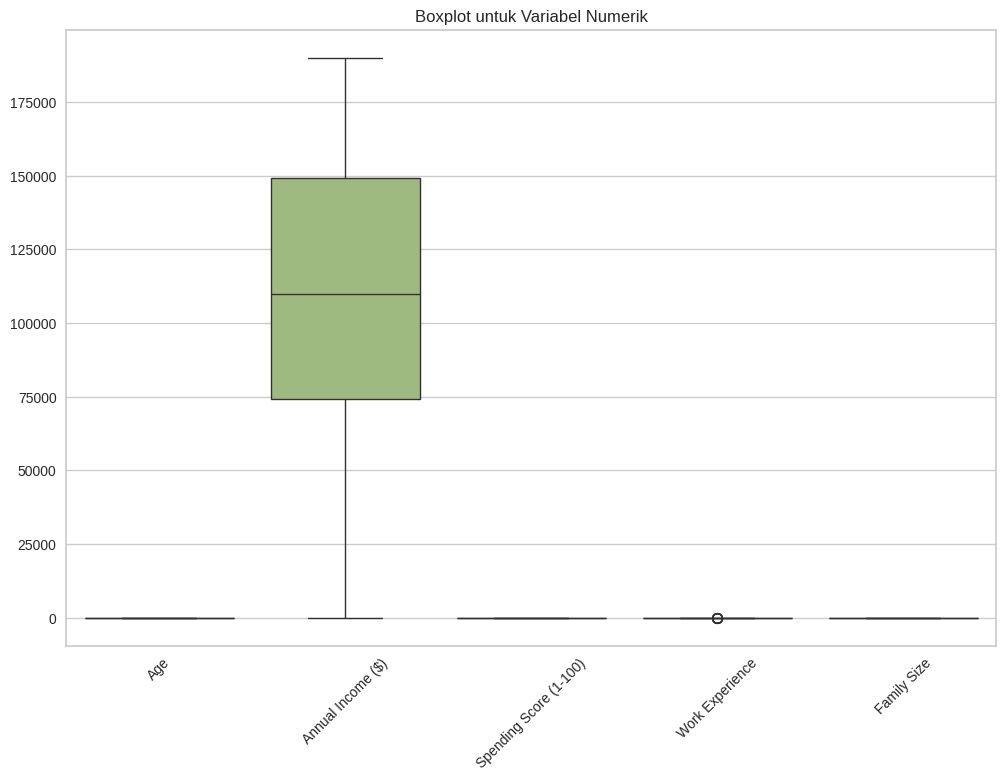

In [113]:
#Boxplot untuk visualisasi outlier pada variabel numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot untuk Variabel Numerik')
plt.xticks(rotation=45)
plt.show()


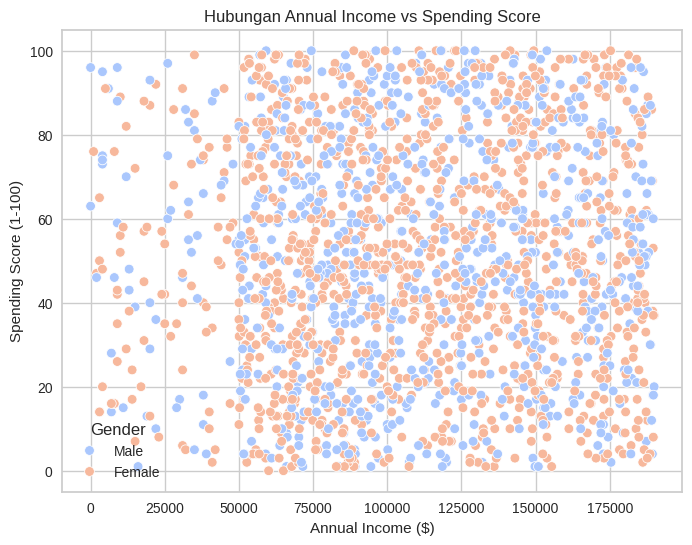

In [114]:
#Scatter plot antara Annual Income dan Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Gender', palette='coolwarm')
plt.title('Hubungan Annual Income vs Spending Score')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [115]:
#menghapus data duplikat
df.duplicated().sum()
df = df.drop_duplicates()

In [116]:
#Pada Histogram  tedapat data dengan pemasukan = 0
df[df['Annual Income ($)']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
169,170,Male,32,0,63,Artist,2,2
246,247,Male,23,0,96,Doctor,1,3


In [117]:
# Mengganti income 0 dengan rata-rata dari masing-masing profesi
# Menghitung rata-rata income per profesi
income_mean_per_profession = df.groupby('Profession')['Annual Income ($)'].mean()

# Mengganti nilai 0 pada kolom 'Annual Income ($)' dengan rata-rata income per profesi
df['Annual Income ($)'] = df.apply(
    lambda row: income_mean_per_profession[row['Profession']] if row['Annual Income ($)'] == 0 else row['Annual Income ($)'],
    axis=1  # Menambahkan penutupan tanda kurung yang hilang
)

In [118]:
#Pada histogram terdapat umur 0
print(df[df['Age']==0])

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
211          212  Female    0            22000.0                      92   
228          229    Male    0            33000.0                      64   
333          334    Male    0           173743.0                      96   
443          444  Female    0            68761.0                      16   
466          467    Male    0           186002.0                      80   
559          560    Male    0           151298.0                      89   
562          563  Female    0           142892.0                      25   
767          768  Female    0           143910.0                      22   
794          795  Female    0           147719.0                      86   
821          822  Female    0           116759.0                      28   
852          853  Female    0           121926.0                      41   
863          864  Female    0           141351.0                      10   
938         

In [119]:
# Menggunakan Work Experience untuk estimasi Age
# diasumsikan bahwa pengalaman kerja dan umur berhubungan secara langsung
df['Age'] = df.apply(lambda row: row['Work Experience'] + 22 if row['Age'] == 0 else row['Age'], axis=1) #angka 22 dianggap sebagai umur awal seseorang memiliki pengalaman kerja

In [120]:
#Encoder data kategorikal
df_encoded = pd.get_dummies(df)
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
df_encoded

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000.0,39,5,1,4
1,2,1,21,35000.0,81,2,3,3
2,3,0,20,86000.0,6,2,1,1
3,4,0,23,59000.0,77,7,0,2
4,5,0,31,38000.0,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387.0,40,0,8,7
1996,1997,0,91,73158.0,32,1,7,7
1997,1998,1,87,90961.0,14,5,9,2
1998,1999,1,77,182109.0,4,4,7,2


In [121]:
#Menghapus kolom yang tidak diperlukan
df_encoded=df_encoded.drop(columns=['CustomerID'])
df_encoded

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000.0,39,5,1,4
1,1,21,35000.0,81,2,3,3
2,0,20,86000.0,6,2,1,1
3,0,23,59000.0,77,7,0,2
4,0,31,38000.0,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71,184387.0,40,0,8,7
1996,0,91,73158.0,32,1,7,7
1997,1,87,90961.0,14,5,9,2
1998,1,77,182109.0,4,4,7,2


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

      Annual Income ($)  Spending Score (1-100)
0               15000.0                    39.0
1               35000.0                    81.0
2               86000.0                     6.0
3               59000.0                    77.0
4               38000.0                    40.0
...                 ...                     ...
1960           184387.0                    40.0
1961            73158.0                    32.0
1962            90961.0                    14.0
1963           182109.0                     4.0
1964           110610.0                    52.0

[1965 rows x 2 columns]


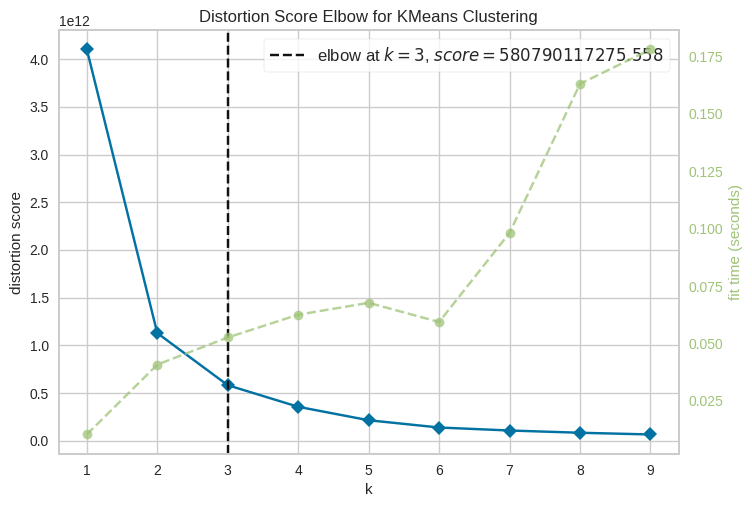

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
features = df_encoded.iloc[:, [2, 3]].values

# Menampilkan data yang diambil sebagai DataFrame dengan nama kolom
columns = ['Annual Income ($)', 'Spending Score (1-100)']
print(pd.DataFrame(features, columns=columns))

# Inisialisasi model KMeans tanpa parameter awal
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal dengan metode Elbow
elbow_kmeans = KMeans(n_init=10, random_state=42)
elbow_visualizer = KElbowVisualizer(elbow_kmeans, k=(1, 10))

# Fit visualizer pada data
elbow_visualizer.fit(features)

# Menampilkan grafik Elbow untuk analisis
elbow_visualizer.show()


In [135]:
# Menentukan model KMeans dengan jumlah cluster berdasarkan analisis Elbow
optimal_clusters = 3  # Jumlah cluster yang ditemukan
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)

# Melatih model pada data dan mendapatkan label cluster
cluster_labels = kmeans_model.fit_predict(features)

# Menghitung skor Silhouette
silhouette_avg = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Menambahkan label cluster ke dalam DataFrame asli
df['Cluster'] = cluster_labels


Silhouette Score: 0.56


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

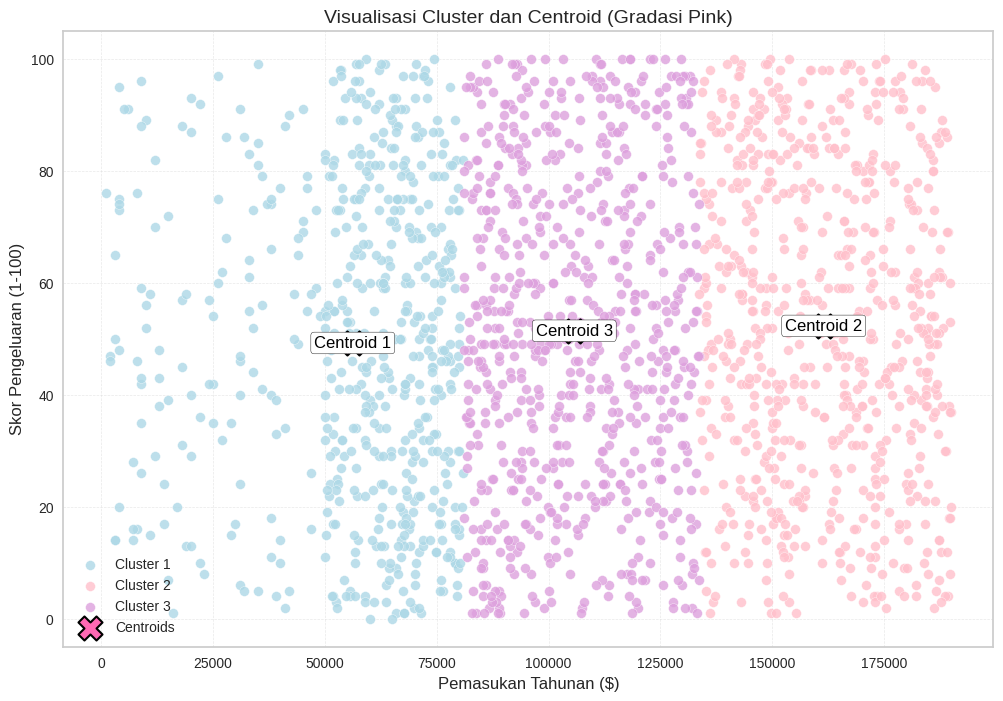


Posisi Centroids:
Centroid 1: Pemasukan = $56,224.56, Skor Pengeluaran = 49.24
Centroid 2: Pemasukan = $161,486.57, Skor Pengeluaran = 52.29
Centroid 3: Pemasukan = $105,739.69, Skor Pengeluaran = 51.41


In [141]:
# Posisi centroid
centroid_positions = kmeans_model.cluster_centers_

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Skema warna pink untuk cluster
pink_shades = ['#ADD8E6', '#FFC0CB', '#DDA0DD']

# Plot data dengan warna sesuai cluster
for cluster_id in range(optimal_clusters):
    cluster_points = features[cluster_labels == cluster_id]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        color=pink_shades[cluster_id % len(pink_shades)],
        s=50,
        alpha=0.8,
        edgecolor='w',
        label=f'Cluster {cluster_id + 1}'
    )

# Plot centroid
plt.scatter(
    centroid_positions[:, 0],
    centroid_positions[:, 1],
    c='#FF69B4',  # Warna pink yang lebih cerah
    s=300,
    marker='X',
    edgecolor='black',
    linewidth=1.5,
    label='Centroids'
)

# Menambahkan label centroid
for idx, position in enumerate(centroid_positions):
    plt.text(
        position[0],
        position[1],
        f'Centroid {idx + 1}',
        color='black',
        fontsize=12,
        ha='center',
        va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
    )

# Menambahkan elemen plot
plt.title('Visualisasi Cluster dan Centroid (Gradasi Pink)', fontsize=14)
plt.xlabel('Pemasukan Tahunan ($)', fontsize=12)
plt.ylabel('Skor Pengeluaran (1-100)', fontsize=12)
plt.legend()
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Menampilkan posisi centroid dalam bentuk tabel
print("\nPosisi Centroids:")
for i, centroid in enumerate(centroid_positions):
    print(f"Centroid {i + 1}: Pemasukan = ${centroid[0]:,.2f}, Skor Pengeluaran = {centroid[1]:.2f}")

# Tambahkan label cluster ke DataFrame untuk analisis lebih lanjut
df['Cluster'] = cluster_labels

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [142]:
def cluster_analysis(X, labels, num_clusters, feature_names=None, centroids=None):
    """
    Menganalisis karakteristik setiap cluster.

    Parameters:
        X (ndarray): Dataset (n_samples, n_features).
        labels (ndarray): Label cluster untuk setiap data poin.
        num_clusters (int): Jumlah cluster.
        feature_names (list, optional): Nama fitur untuk deskripsi. Default None.
        centroids (ndarray, optional): Posisi centroid cluster. Default None.
    """
    if feature_names is None:
        feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(num_clusters):
        # Mengambil data untuk cluster tertentu
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata fitur untuk cluster saat ini
        feature_means = cluster_data.mean(axis=0)
        cluster_size = cluster_data.shape[0]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Jumlah anggota: {cluster_size}")
        for idx, feature_name in enumerate(feature_names):
            print(f"  Rata-rata {feature_name}: {feature_means[idx]:.2f}")

        # Menampilkan centroid jika tersedia
        if centroids is not None:
            print("  Posisi Centroid:")
            for idx, feature_name in enumerate(feature_names):
                print(f"    {feature_name}: {centroids[cluster_id, idx]:.2f}")

# Contoh penggunaan
feature_names = ['Pemasukan Tahunan ($)', 'Spending Score (1-100)']
cluster_analysis(X, labels, num_clusters=3, feature_names=feature_names, centroids=centroids)



Analisis Karakteristik Setiap Cluster:

Cluster 1:
Jumlah anggota: 682
  Rata-rata Pemasukan Tahunan ($): 161852.91
  Rata-rata Spending Score (1-100): 52.16
  Posisi Centroid:
    Pemasukan Tahunan ($): 56224.56
    Spending Score (1-100): 49.24

Cluster 2:
Jumlah anggota: 696
  Rata-rata Pemasukan Tahunan ($): 106349.36
  Rata-rata Spending Score (1-100): 51.45
  Posisi Centroid:
    Pemasukan Tahunan ($): 161486.57
    Spending Score (1-100): 52.29

Cluster 3:
Jumlah anggota: 587
  Rata-rata Pemasukan Tahunan ($): 56521.25
  Rata-rata Spending Score (1-100): 49.38
  Posisi Centroid:
    Pemasukan Tahunan ($): 105739.69
    Spending Score (1-100): 51.41


### Analisis Karakteristik Setiap Cluster

#### Cluster 1: "High-Income Savers"
- **Rata-rata Pemasukan**: 161,852.91
- **Rata-rata Spending Score**: 52.16

**Interpretasi:**
Cluster ini memiliki pendapatan tinggi, namun skor pengeluaran mereka tidak terlalu tinggi. Meskipun mereka memiliki kapasitas lebih besar untuk berbelanja, mereka cenderung lebih hemat dan bijak dalam mengelola pengeluaran mereka. Cluster ini mungkin terdiri dari individu dengan pekerjaan stabil atau yang memiliki sumber pendapatan tambahan.

#### Cluster 2: "Middle-Income Spenders"
- **Rata-rata Pemasukan**: 106,349.36
- **Rata-rata Spending Score**: 51.45

**Interpretasi:**
Dengan pemasukan yang lebih rendah daripada Cluster 1, tetapi masih cukup baik, cluster ini menunjukkan tingkat pengeluaran yang hampir sama dengan cluster sebelumnya. Skor pengeluaran yang relatif seimbang menunjukkan bahwa meskipun pendapatan mereka tidak setinggi Cluster 1, individu dalam cluster ini mungkin memiliki gaya hidup yang agak boros atau cenderung mengeluarkan uang dengan cara yang lebih bebas dibandingkan dengan Cluster 1. Mereka mungkin memiliki prioritas pengeluaran yang lebih tinggi meskipun pendapatan mereka sedikit lebih rendah.

#### Cluster 3: "Low-Income Budgeters"
- **Rata-rata Pemasukan**: 56,521.25
- **Rata-rata Spending Score**: 49.38

**Interpretasi:**
Cluster ini memiliki pendapatan yang lebih rendah dibandingkan dua cluster lainnya, dan juga memiliki skor pengeluaran yang sedikit lebih rendah. Ini menunjukkan bahwa individu dalam cluster ini mungkin lebih memperhatikan anggaran mereka dan memiliki pola pengeluaran yang lebih hemat atau terkendali. Mereka mungkin lebih cenderung untuk mencari harga yang lebih murah atau memilih produk dengan nilai yang lebih tinggi dibandingkan dengan cluster lainnya, mengingat mereka memiliki pendapatan yang lebih terbatas.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [131]:
# Menyimpan hasil clustering ke dalam file CSV
df.to_csv('Clustered_Customers.csv', index=False)